# Breadth First Search - *Uninformed Search*

### Overview
This notebook implements Breadth First Search (BFS) an uninformed search algorithm. The goal is to find a path from the start to the finish in a maze represented as a 2D array.
### Breadth First Search
- Breadth First Search (BFS) explores all nodes at each depth, before expanding nodes at a layer under.  This means unlike DFS, the node in the frontier are explored using a First In First Out (FIFO) queue, where the *oldest* discovered node is expanded first.
- This implementation of BFS will include `path-cost` to return an optimal solution.
### Search Strategy
- Initializes the frontier using the initial state of the problem. Explore set = None.
- Take the *first* node in the queue and removes it from the frontier. 
- Check if the node is goal state. 
- if the frontier is empty break. 
- if not? FIFO pop() (oldest) from frontier.
- Add the node to explored set
- For every neighbour of the current node
- Loop until frontier is empty or goal is found. 

### Steps:
1. **Convert the maze into a 2D Array**: Load maze data and convert it to integer format for processing.
2. **Implementing BFS**: Use a stack class with FIFO queue to manage the nodes during the search process.
3. **Visualizing the Path**: Use matplotlib to illustrate the start, the path, and the goal within the maze.




# Implementing Breadth First Search

# Load and Prepare Maze Data
1. Load the maze data and convert it to a usable format.
2. Find the starting state (2)
3. Find the end state (9) 

In [15]:
from Breadth_First_Search import *
from Helpers import *
from Visualisations import *


In [16]:
# take the string maze, load it to text with numpy
# Convert string type to int
maze_array_string = np.loadtxt('/Users/calebcougle/PycharmProjects/CAI104_COUGLE_A3/Mazes/a3maze.txt', dtype='str',
                               delimiter=",")
bfs_a3_maze = string_to_int_array(maze_array_string)

# The output is a 2D numpy array 
print(bfs_a3_maze)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 9 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [17]:
bfs_a3_maze_start_point = find_start(bfs_a3_maze)
bfs_a3_maze_goal_point = find_goal(bfs_a3_maze)

print("Start", bfs_a3_maze_start_point, "Goal:", bfs_a3_maze_goal_point)

Start (2, 2) Goal: (4, 20)


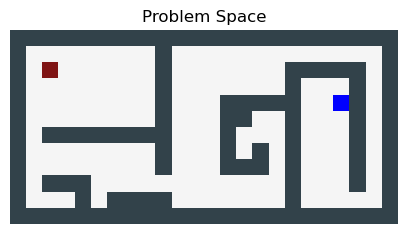

In [18]:
plot_maze(bfs_a3_maze, "Problem Space")

# FIFO Queue Class Definition
- The data queue class from DFS can be adapted for BFS; *however*, it functions as a LIFO with the `FIFO_Pop()` method.
- The stack holds the frontier or 'discovered' nodes pending exploration.
- The class methods labeled FIFO implement the BFS search strategy, `First in First Out`, returning the oldest node from the queue
(Russell & Norvig, 2016)

# Breadth First Search (BFS) Implementation

- **Function Definition**: The `bfs()` function implements the breadth-first search algorithm, utilizing methods from the `fifo` class to manage nodes during the search.
- **Initial State**: The starting node (`start`) is pushed onto the stack, as identified in previous functions.
- **Predecessors Dictionary**: The `predecessors{}` dictionary functions similarly to an explored list; it records node traversal and returns the solution path when the goal is found.
- **Current Node**: The `current_cell`, analogous to the current node, is the most recently added node on the stack, retrieved using the `fifo.pop(0)` method.
- **Expanding Frontier**: The frontier expands as the nested `for` loop iterates over directions, pushing neighbors onto the stack. Neighbors are discovered by adding the directional offset to the current node's array index. *Example:* Turn Right = `current_column + 1`.
- **Dead End Handling**: The `is_legal_pos()` function checks for dead ends, walls, and maze boundaries, ensuring movements are within the permissible range.
- **Goal Check & Solution Path**: If the current node is the goal, the `get_path()` function is invoked to backtrack through the `predecessors` dictionary and construct the path from the start to the goal.


In [19]:
bfs_solution_path, bfs_traversed = bfs(bfs_a3_maze, bfs_a3_maze_start_point, bfs_a3_maze_goal_point)
print("Solution path:", bfs_solution_path, "\nTraversed:", bfs_traversed)

Solution path: [(2, 2), (3, 2), (4, 2), (5, 2), (5, 1), (6, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 8), (9, 8), (9, 9), (9, 10), (8, 10), (7, 10), (6, 10), (5, 10), (4, 10), (3, 10), (2, 10), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (2, 22), (3, 22), (4, 22), (5, 22), (6, 22), (7, 22), (8, 22), (9, 22), (10, 22), (10, 21), (10, 20), (9, 20), (8, 20), (7, 20), (6, 20), (5, 20), (4, 20)] 
Traversed: [(2, 2), (1, 2), (2, 3), (3, 2), (2, 1), (1, 3), (1, 1), (2, 4), (3, 3), (4, 2), (3, 1), (1, 4), (2, 5), (3, 4), (4, 3), (5, 2), (4, 1), (1, 5), (2, 6), (3, 5), (4, 4), (5, 3), (5, 1), (1, 6), (2, 7), (3, 6), (4, 5), (5, 4), (6, 1), (1, 7), (2, 8), (3, 7), (4, 6), (5, 5), (7, 1), (1, 8), (3, 8), (4, 7), (5, 6), (7, 2), (8, 1), (4, 8), (5, 7), (7, 3), (8, 2), (9, 1), (5, 8), (7, 4), (8, 3), (10, 1), (7, 5), (8, 4), (10, 2), (7, 6), (8, 5), (10, 3), (7, 7), (8, 6), (9, 5), (7, 8), (8, 7),

# Visualize the Path
- Run the BFS algorithm and visualize the results using MatplotLip.
- The function `update_maze_with_path()` plots the path on the maze as 4 

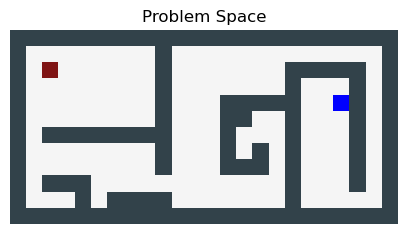

In [20]:
plot_maze(bfs_a3_maze, "Problem Space")

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 6 6 6 6 6 6 6 6 1 4 4 4 4 4 4 4 4 4 4 4 4 4 1]
 [1 6 2 6 6 6 6 6 6 1 4 6 6 6 6 6 6 1 1 1 1 1 4 1]
 [1 6 4 6 6 6 6 6 6 1 4 6 6 6 6 6 6 1 0 0 0 1 4 1]
 [1 6 4 6 6 6 6 6 6 1 4 6 6 1 1 1 1 1 0 0 9 1 4 1]
 [1 4 4 6 6 6 6 6 6 1 4 6 6 1 1 6 6 1 0 0 4 1 4 1]
 [1 4 1 1 1 1 1 1 1 1 4 6 6 1 6 6 6 1 0 6 4 1 4 1]
 [1 4 4 4 4 4 4 4 4 1 4 6 6 1 6 1 6 1 6 6 4 1 4 1]
 [1 6 6 6 6 6 6 6 4 1 4 6 6 1 1 1 6 1 6 6 4 1 4 1]
 [1 6 1 1 1 6 6 6 4 4 4 6 6 6 6 6 6 1 6 6 4 1 4 1]
 [1 6 6 6 1 6 1 1 1 1 6 6 6 6 6 6 6 1 6 6 4 4 4 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


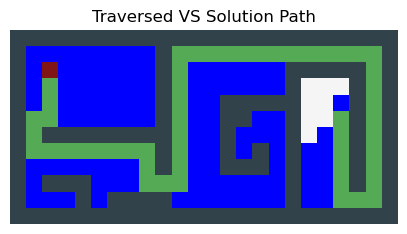

In [21]:
bfs_updated = update_maze_with_path(bfs_a3_maze, bfs_solution_path, bfs_traversed, bfs_a3_maze_start_point,
                                    bfs_a3_maze_goal_point)

print(bfs_updated)
plot_maze(bfs_updated, "Traversed VS Solution Path")